# MODEL TRAINING


### 1.1 Importing data and respective packages

#### importing pandas numpy matplotlib seaborn and warnings library

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df=pd.read_csv("stud.csv")

#### showing top 5 records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### considering math_score as the dependent feature and other has independent feature

#### preparing X and Y variable

In [6]:
x=df.drop(columns=["math_score"],axis=1)

In [7]:
y=df["math_score"]

In [8]:
#creating column transformation with 3 types of transformation
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transfer=StandardScaler()
object_transfer=OneHotEncoder()

preprocessor = ColumnTransformer(
[
    ("OneHotEncoder",object_transfer,cat_features),
    ("StandardScaler",numeric_transfer,num_features),
       
]
)

In [9]:
x= preprocessor.fit_transform(x)

In [10]:
x.shape

(1000, 19)

In [11]:
#seperating the data set in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

### Creating a evaluate function to give all the matrics after the model training

In [12]:
def evaluate_mode(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

### model list

In [13]:
models={
    "linear Regression":LinearRegression(),
    "lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regression":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBoost":XGBRegressor(),
    "catboosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
    
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    
    #making prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #evaluating train and test dataset
    
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2= evaluate_mode(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2= evaluate_mode(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print('model performance for traing set')
    print("- rms error:{:.4f}".format(model_train_rmse))
    print("- mae: {:.4f}".format(model_train_mae))
    print("- r2 score:{:.4f}".format(model_train_r2))
    
    print("------------------------------------------")
    
    print('model performance for testing set')
    print("- rms error:{:.4f}".format(model_test_rmse))
    print("- mae: {:.4f}".format(model_test_mae))
    print("- r2 score:{:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')



linear Regression
model performance for traing set
- rms error:5.3293
- mae: 4.2715
- r2 score:0.8740
------------------------------------------
model performance for testing set
- rms error:5.4252
- mae: 4.2222
- r2 score:0.8790


lasso
model performance for traing set
- rms error:6.5938
- mae: 5.2063
- r2 score:0.8071
------------------------------------------
model performance for testing set
- rms error:6.5197
- mae: 5.1579
- r2 score:0.8253


Ridge
model performance for traing set
- rms error:5.3233
- mae: 4.2650
- r2 score:0.8743
------------------------------------------
model performance for testing set
- rms error:5.3904
- mae: 4.2111
- r2 score:0.8806


K-Neighbors Regression
model performance for traing set
- rms error:5.7079
- mae: 4.5168
- r2 score:0.8555
------------------------------------------
model performance for testing set
- rms error:7.2530
- mae: 5.6210
- r2 score:0.7838


Decision Tree
model performance for traing set
- rms error:0.2795
- mae: 0.0187
- r2 score:

### Results

In [16]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score'])

,Model Name,R2_Score
0,linear Regression,0.879046
1,lasso,0.825320
2,Ridge,0.880593
3,K-Neighbors Regression,0.783813
4,Decision Tree,0.724581
5,Random Forest Regressor,0.850375
6,XGBoost,0.821589
7,catboosting Regressor,0.851632
8,AdaBoost Regressor,0.845326


### Linear Regression

In [17]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of model is=%.2f"%score)

accuracy of model is=87.90


### Plot y_pred and Y_test

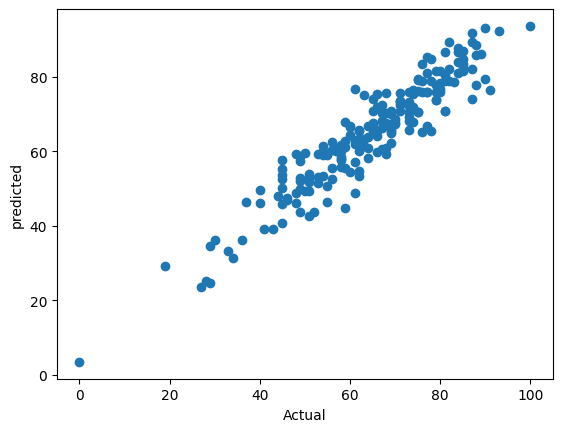

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

<Axes: xlabel='math_score'>

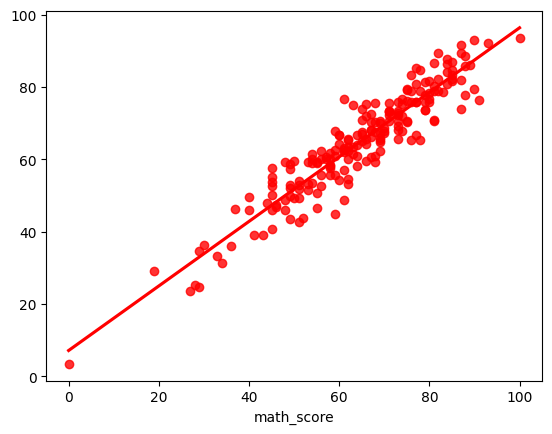

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

### Difference between actual and predicted values

In [20]:
pred_df=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})

In [21]:
pred_df.head()

,actual value,predicted value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
